### Задание 3. Исследование алгоритмов классификацииm

#### Классы

Класс - это группа объектов или явлений, обладающих общими свойствами. Класс играет важную роль в технологиях обнаружения и представление знаний. 
Например, среди людей с проблемами со здоровьем  можно выделить классы тех, кто старается вести здоровый образ жизни и которые позволяют себе вредные привычки. Также людей можно разбить на классы по уровню их физической подготовки (имеют избыточный вес, тучные, нормальные или спортивные) и т.д.

В отличие от кластеров, которые формируются в процессе кластеризации, классы должны быть определены заранее. Поэтому обучение классификаторов — это задача обучения с учителем.

Датасет для данной лабораторной будет использоваться отличный от предыдущего: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

Набор данных Sleep Health and Lifestyle состоит из 400 строк и 13 столбцов, охватывающих широкий спектр переменных, связанных со сном и повседневными привычками. Он включает в себя такие детали, как пол, возраст, род занятий, продолжительность сна, качество сна, уровень физической активности, уровень стресса, категория ИМТ, артериальное давление, частота сердечных сокращений, ежедневные шаги, а также наличие или отсутствие нарушений сна. 


### 1. Классификация (kNN, Дерево решений) и анализ данных

#### Классификация

Задача классификации в машинном обучении — это задача отнесения объекта к одному из заранее определенных классов на основании его формализованных признаков. Каждый из объектов в этой задаче представляется в виде вектора в N-мерном пространстве, каждое измерение в котором представляет собой описание одного из признаков объекта. 

Нам предстоит классифицировать данные о качестве сна людей: измерениями в нашем пространстве параметров будут пол, возраст, продолжительность сна, уровень стресса, пульс и др.

#### Алгоритм kNN

В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k соседей данного элемента, классы которых уже известны.

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

   1. Вычислить расстояние до каждого из объектов обучающей выборки
   2. Отобрать k объектов обучающей выборки, расстояние до которых минимально
   3. Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('D:/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### Категоризация артериального давления

Разделим давление людей на несколько условных групп. Например, группа "нормального давления" будет до 120/80, Повышенное - от 120/80 до 130/90 и Высокое - выше 130/90

In [4]:
df.loc[df['Blood Pressure']<'120/80','Blood_Pressure_Category'] ='Normal'
df.loc[df['Blood Pressure'].between('121/81','130/90'),'Blood_Pressure_Category'] ='Elevated'
df.loc[df['Blood Pressure']>'130/91','Blood_Pressure_Category']= 'High'

In [19]:
df['BMI Category'].replace({'Normal':0,'Normal Weight':0,'Overweight':1,'Obese':2},inplace = True)

#### Построение корреляции

Проанализируем дополнительно как коррелирует некоторые показатели друг с другом.

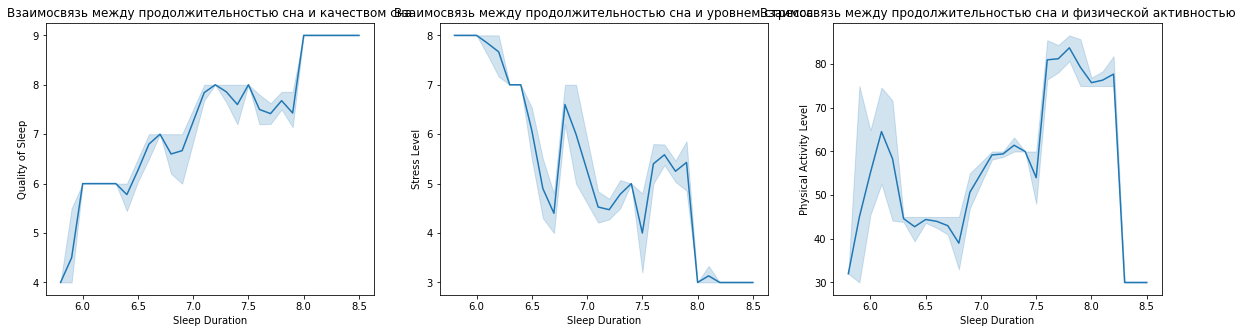

In [8]:
fig,axes = plt.subplots(nrows=1,ncols = 3,figsize=(20,5))

sns.lineplot(ax=axes[0],x='Sleep Duration',y='Quality of Sleep',data = df);
sns.lineplot(ax=axes[1],x='Sleep Duration',y ='Stress Level',data = df);
sns.lineplot(ax=axes[2],x='Sleep Duration',y ='Physical Activity Level',data = df);

axes[0].title.set_text('Взаимосвязь между продолжительностью сна и качеством сна')
axes[1].title.set_text('Взаимосвязь между продолжительностью сна и уровнем стресса')
axes[2].title.set_text('Взаимосвязь между продолжительностью сна и физической активностью')

Можно также расмотреть качество сна между различными группами испытумых по роду деятельности.

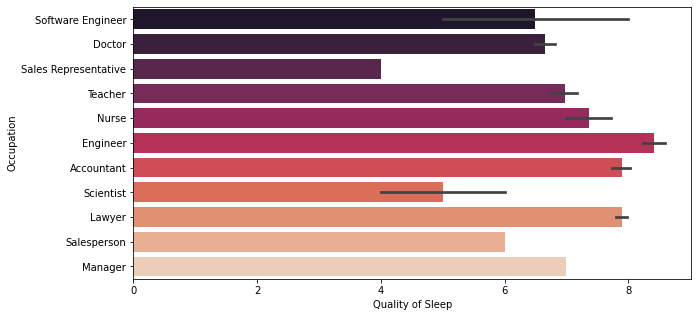

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='Quality of Sleep',y='Occupation',data = df, orient='h',palette = 'rocket');

#### ML модель

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
df = pd.get_dummies(df,columns = ['Sleep Disorder','Sleep Disorder','Blood_Pressure_Category'])

In [25]:
df.drop(columns = ['Person ID','Occupation','Quality of Sleep','Blood Pressure'],inplace = True)
df['Gender']= df['Gender'].replace({'Male':1,'Female':2})

X = df.drop('Sleep Duration',axis = 1)
y = df['Sleep Duration']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [27]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#### Линейная регрессия

In [51]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train_scaled,y_train)
ridge_pred = ridge_reg.predict(X_test_scaled)


print('Mean squared error:', mean_squared_error(y_test, ridge_pred))
print('R-squared:', r2_score(y_test, ridge_pred))

Mean squared error: 0.06207868106214097
R-squared: 0.9095953223387258


#### KNN регрессия

In [48]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train_scaled,y_train)
knn_pred = knn.predict(X_test_scaled)


print('Mean squared error:', mean_squared_error(y_test, knn_pred))
print('R-squared:', r2_score(y_test, knn_pred))

Mean squared error: 0.05170088495575222
R-squared: 0.924708422291564


#### Случайный лес

In [52]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean squared error: 0.010415659276407455
R-squared: 0.9848317602210217


#### Lasso регрессия

In [54]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

model = Lasso(alpha=0.1)

model.fit(X_train_scaled, y_train)
laso_pred = model.predict(X_test_scaled)

print('Mean squared error:', mean_squared_error(y_test, laso_pred))
print('R-squared:', r2_score(y_test, laso_pred))

Mean squared error: 0.16443863055908278
R-squared: 0.7605293615069835


### 2. Метрики оценки качества

#### ROC - AUC

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

### 3. Выводы

Данные показывают, что существует четкая корреляция между некоторыми параметрами, такими как продолжительностью и качеством сна. Существует целый ряд факторов, которые могут повлиять на качество сна, включая уровень стресса, физическую активность и род занятий. 